# Lab 01 : MNIST multi-layer -- demo

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils

### Download the data

In [2]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')
test_label=torch.load(data_path+'mnist/test_label.pt')

### Make a two layer net class. 

In [3]:
class two_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size,  output_size):
        super(two_layer_net , self).__init__()
        
        self.layer1 = nn.Linear(  input_size   , hidden_size  , bias=False  )
        self.layer2 = nn.Linear(  hidden_size  , output_size   , bias=False  )
        
        
    def forward(self, x):
        
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        scores  = self.layer2(y_hat)
        
        return scores

### Build the net (recall that a one layer net had 7,840 parameters)

In [4]:
net=two_layer_net(784,50,10)

print(net)
utils.display_num_param(net)

two_layer_net(
  (layer1): Linear(in_features=784, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=10, bias=False)
)
There are 39700 (0.04 million) parameters in this neural network


### Choose the criterion, optimizer, batchsize, learning rate

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=20

### Evaluate on test set

In [6]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,10000,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data.view(bs,784)

        scores=net( inputs ) 

        error = utils.get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

### Training loop

In [7]:
start = time.time()

for epoch in range(200):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 5 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, '\t time=', elapsed_time,
              '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
        eval_on_test_set()
               

 
epoch= 0 	 time= 1.5663700103759766 	 loss= 0.7022713695690036 	 error= 17.078333522876104 percent
test error  =  10.120000410079957 percent
 
epoch= 5 	 time= 9.432515144348145 	 loss= 0.22390149033349008 	 error= 6.216667409737905 percent
test error  =  6.070000624656678 percent
 
epoch= 10 	 time= 17.865931034088135 	 loss= 0.16048691512302807 	 error= 4.478334061304729 percent
test error  =  4.620000553131103 percent
 
epoch= 15 	 time= 26.04132318496704 	 loss= 0.12577241894525165 	 error= 3.4983339846134185 percent
test error  =  4.120000541210175 percent
 
epoch= 20 	 time= 34.57222294807434 	 loss= 0.10372214950512473 	 error= 2.8650005559126535 percent
test error  =  3.5500005245208746 percent
 
epoch= 25 	 time= 42.853976249694824 	 loss= 0.08861428492399864 	 error= 2.445000505447388 percent
test error  =  3.34000049829483 percent
 
epoch= 30 	 time= 51.1626660823822 	 loss= 0.07727210836469506 	 error= 2.1133337954680127 percent
test error  =  3.1100004792213443 percent
 

### Choose image at random from the test set and see how good/bad are the predictions

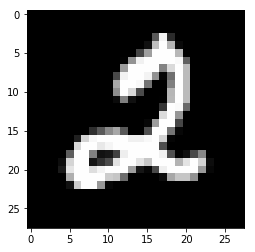

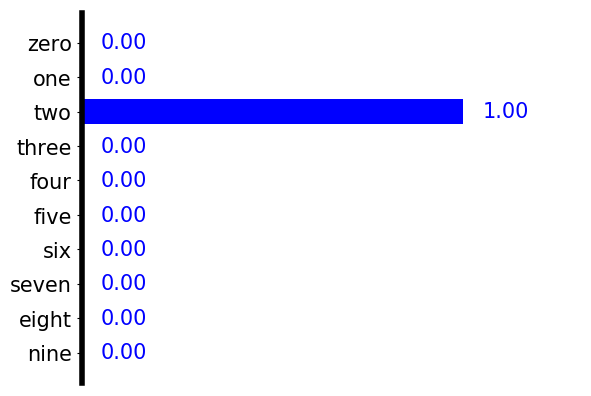

In [8]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)